### 网络科学理论
***
***
# 网络科学：使用NetworkX分析复杂网络
***
***

刘琪琪 18信管硕

In [1]:
#作业一
#下载www数据
#构建networkx的网络对象g（提示：有向网络）
#将www数据添加到g当中
#计算网络中的节点数量和链接数量
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [7]:
G = nx.DiGraph() #DiGraph为有向图
n = 0
with open ('www.dat.gz.txt') as f:
    for line in f:
        n += 1
        x, y = line.rstrip().split(' ')
        G.add_edge(x,y)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 325729
Number of edges: 1497134
Average in degree:   4.5963
Average out degree:   4.5963


In [8]:
#作业二
#计算www网络的网络密度
print(nx.density(G))

1.4110719364589702e-05


In [9]:
#作业三 计算www网络入度出度分布
from collections import defaultdict
import numpy as np

In [14]:
def plotInOutDegreeDistribution(G):
    """
    画有向图G的入度和出度分布 渲染在同一个图中
    """
    in_degs = defaultdict(int)
    out_degs = defaultdict(int)
    for i in dict(nx.in_degree_centrality(G)).values(): in_degs[i]+=1
    for i in dict(nx.out_degree_centrality(G)).values(): out_degs[i]+=1
    fig = plt.figure(figsize=(25, 5),facecolor='white')
    a_fig = plt.subplot(1,2,1)
    items = sorted ( in_degs.items () )
    x, y = np.array(items).T
    y_sum = np.sum(y)
    y = [float(i)/y_sum for i in y]
    plt.plot(x, y, 'b-o')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(['InDegree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P(K)$', fontsize = 20)
    plt.title('$InDegree\,Distribution$', fontsize = 20)
    b_fig = plt.subplot(1,2,2)
    items = sorted ( out_degs.items () )
    x, y = np.array(items).T
    y_sum = np.sum(y)
    y = [float(i)/y_sum for i in y]
    plt.plot(x, y, 'b-o')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(['OutDegree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P(K)$', fontsize = 20)
    plt.title('$OutDegree\,Distribution$', fontsize = 20)
    plt.show()

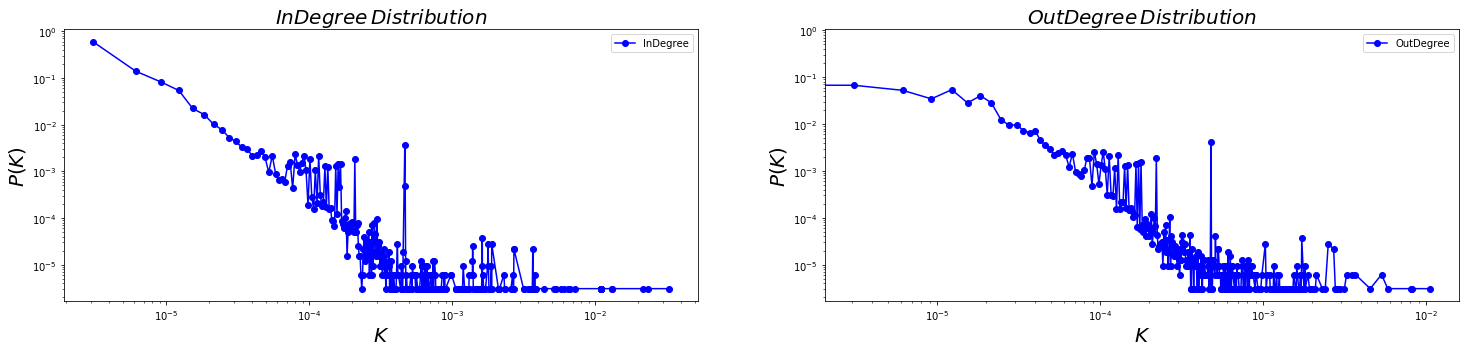

In [15]:
plotInOutDegreeDistribution(G)

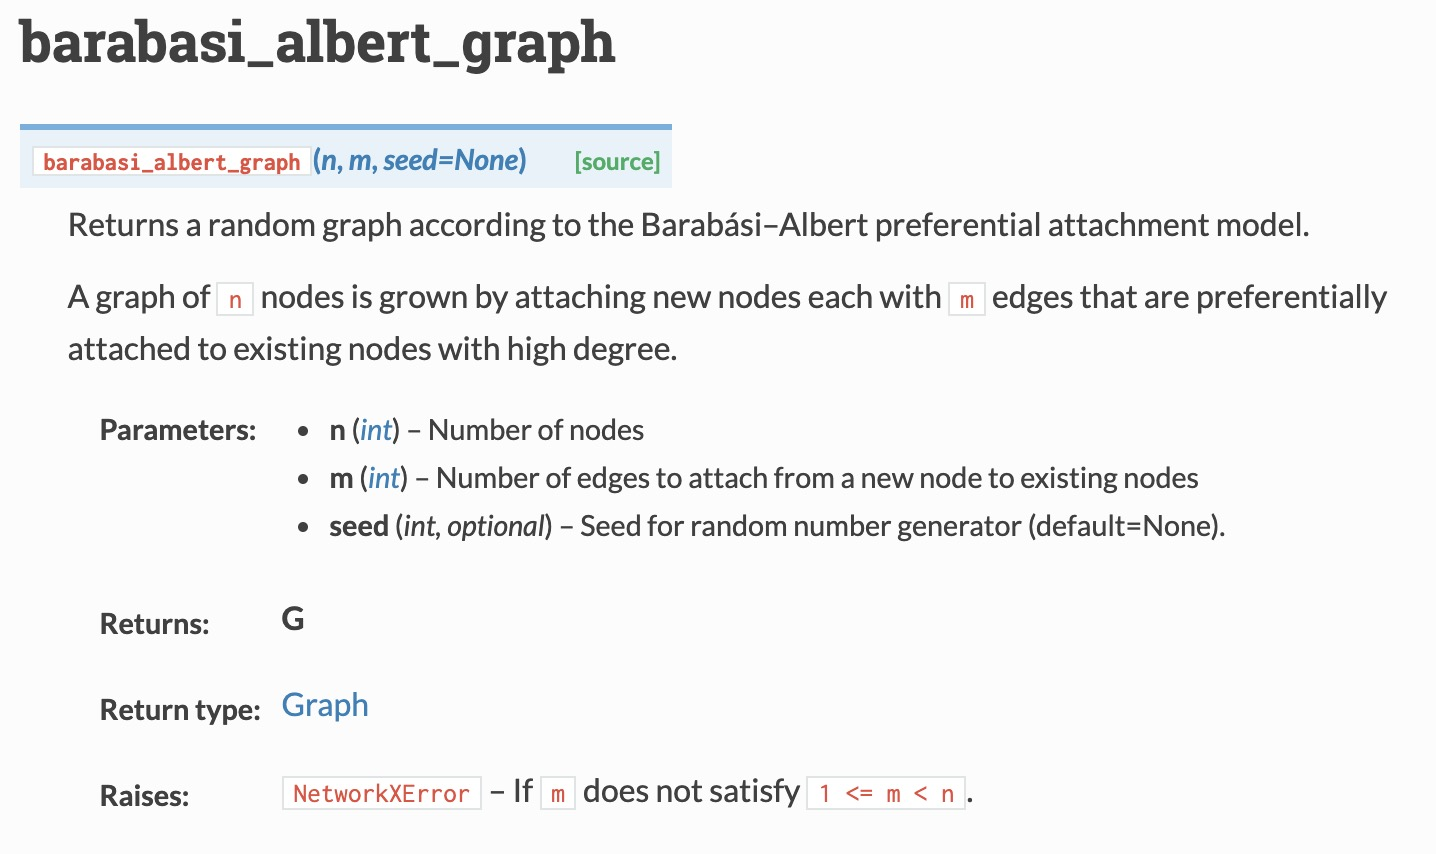

# BA网络理解
*  通过附加新的节点（每个节点都有m条边），优先附加到高阶的现有节点上，可以生成n个节点的图。
*  初始状态有m_0个节点
    1. 增长原则：每次加入一个节点i （加入时间记为t_i）, 每个节点的加入带来m条边，2m个度的增加
        其中老节点分到的度数是m，新加入的那一个节点分到的度数为m
        那么到时间t的时候，网络的总节点数是m_0 + t，网络的总度数为2mt。
    

# BA网络理解
* 优先链接原则：每一次从m条边中占有一条边的概率正比于节点的度k_i
    那么显然，加入的越早（t_i越小）越容易获得更多的链接数。
    从时间0开始，每一个时间步系统中的节点度k_i是不断增加的


spend time: 108.40245199203491 s


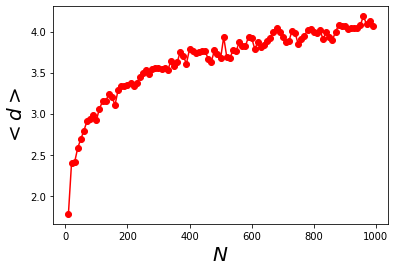

In [16]:
#作业三 
#使用BA模型生成节点数为N、幂指数为 𝛾 的网络 
#计算平均路径长度d与节点数量的关系
import time
Ns = [i*10 for i in range(1,100)] #节点数为10、20、30……1000
ds = []
start = time.time()
for N in Ns:
    #print(N)
    BA= nx.random_graphs.barabasi_albert_graph(N,2)#生成节点数为N，加入节点时生成边为2的BA图
    d = nx.average_shortest_path_length(BA) #计算BA图的平均路径长度
    ds.append(d)
end = time.time()
print("spend time:",end - start,"s")#计算程序
plt.plot(Ns, ds, 'r-o')
plt.xlabel('$N$', fontsize = 20)
plt.ylabel('$<d>$', fontsize = 20)
#plt.xscale('log')
plt.show()

# Thank you！